In [17]:
import torch

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [12]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

In [102]:
# Create the training set of bigrams (x, y)

def inputs(words, firstn=None):
    xs, ys = [], []
    words = words if firstn is None else words[:firstn]
    for w in words:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            # print(ch1, ch2)
            xs.append(ix1)
            ys.append(ix2)
        yield torch.tensor(xs), torch.tensor(ys)

print([(xs, ys) for xs, ys in inputs(words, 1)])

SyntaxError: did you forget parentheses around the comprehension target? (2315613992.py, line 16)

In [21]:
xs

tensor([ 0,  5, 13, 13,  1])

In [22]:
ys

tensor([ 5, 13, 13,  1,  0])

In [33]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
xenc.shape

torch.Size([5, 27])

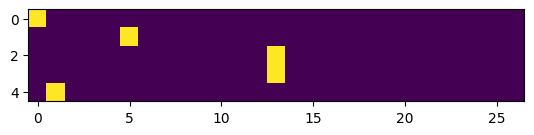

In [31]:
import matplotlib.pyplot as plt

plt.imshow(xenc)

In [34]:
xenc.dtype

torch.float32

In [42]:
W = torch.randn((27,27))
xenc @ W

tensor([[-8.4348e-01, -6.3599e-01, -2.9342e-01, -1.2090e+00, -1.0762e+00,
          1.4709e+00, -4.3272e-03,  2.1842e+00,  2.0196e+00, -5.8639e-01,
          7.8792e-01,  5.9524e-01, -5.3868e-01,  1.2542e-01, -5.3990e-01,
         -8.8206e-02,  5.3349e-01, -1.6474e+00,  1.2064e+00, -8.9869e-01,
          7.5553e-02, -1.9577e-01,  3.1464e-01, -5.4807e-01,  2.7046e-02,
         -2.2378e-02, -4.9682e-04],
        [ 1.7512e+00,  7.0218e-01, -2.2396e+00, -2.8919e-02,  9.7229e-02,
         -1.4037e-02,  2.5357e+00,  8.5312e-01, -8.0750e-01,  1.1692e-01,
          1.4226e+00, -1.0432e+00, -5.2531e-01, -2.2908e-01, -2.3797e-01,
         -1.2262e+00,  9.4677e-01, -1.1976e+00,  8.7976e-01,  4.5405e-01,
          1.3453e+00,  1.0694e+00,  5.5989e-01, -1.9106e-01,  4.4257e-01,
         -1.7538e+00, -5.8785e-01],
        [-1.2383e-01, -3.2990e-01,  2.6597e-01,  5.6772e-01, -5.3842e-01,
          1.2381e+00,  6.2183e-01, -5.0442e-01,  1.1181e+00,  4.6287e-01,
         -3.1878e-01,  5.9864e-01,  1.07

In [63]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N

prob = counts / counts.sum(1, keepdim=True)
prob

tensor([[0.0097, 0.0119, 0.0168, 0.0067, 0.0077, 0.0980, 0.0224, 0.2001, 0.1697,
         0.0125, 0.0495, 0.0408, 0.0131, 0.0255, 0.0131, 0.0206, 0.0384, 0.0043,
         0.0753, 0.0092, 0.0243, 0.0185, 0.0309, 0.0130, 0.0231, 0.0220, 0.0225],
        [0.1088, 0.0381, 0.0020, 0.0184, 0.0208, 0.0186, 0.2385, 0.0443, 0.0084,
         0.0212, 0.0784, 0.0067, 0.0112, 0.0150, 0.0149, 0.0055, 0.0487, 0.0057,
         0.0455, 0.0297, 0.0725, 0.0550, 0.0331, 0.0156, 0.0294, 0.0033, 0.0105],
        [0.0200, 0.0163, 0.0296, 0.0400, 0.0132, 0.0782, 0.0422, 0.0137, 0.0694,
         0.0360, 0.0165, 0.0413, 0.0666, 0.0398, 0.0310, 0.0322, 0.0118, 0.0270,
         0.0261, 0.1150, 0.0350, 0.0428, 0.0812, 0.0115, 0.0391, 0.0107, 0.0138],
        [0.0200, 0.0163, 0.0296, 0.0400, 0.0132, 0.0782, 0.0422, 0.0137, 0.0694,
         0.0360, 0.0165, 0.0413, 0.0666, 0.0398, 0.0310, 0.0322, 0.0118, 0.0270,
         0.0261, 0.1150, 0.0350, 0.0428, 0.0812, 0.0115, 0.0391, 0.0107, 0.0138],
        [0.0145, 0.0385,

In [85]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [94]:
# forward pass
def forward(xs):
    xenc = torch.nn.functional.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdim=True) # probabilities for next character
    return probs
    # the last two lines are together called a `softmax`

forward(xs)

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [79]:
probs.shape

torch.Size([5, 27])

In [88]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [90]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [93]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

In [83]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [87]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('-------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net: ', x)
    print('output probabilities from the neural net: ', probs[i])
    print('label (actual next character: ', y)

    p = probs[i, y]
    print('probabilities assigned by the net to the correct character: ', p.item())

    logp = torch.log(p)
    print('log likelihood: ', logp.item())
    nll = -logp
    print('negative log likelihood: ', nll.item())
    nlls[i] = nll

print('==============')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())

-------------
bigram example 1: .e (indexes 0, 5)
input to the neural net:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character:  5
probabilities assigned by the net to the correct character:  0.012286253273487091
log likelihood:  -4.3992743492126465
negative log likelihood:  4.3992743492126465
-------------
bigram example 2: em (indexes 5, 13)
input to the neural net:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character:  13
probabilities assigned by the net to the cor

In [ ]:
for x in 